
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
medical_df = pd.read_csv("drive/MyDrive/Colab Notebooks/medical-charges.csv")
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**1. За допомогою кореляційного аналізу подивитись, як charges залежить від кожної з інших змінних.**

**2. Візуальний аналіз через скаттер-плоти, box-плоти тощо, аби краще побачити зв’язок між змінними та charges.**

**3. Щодо категоріальних змінних, можна розбити дані на групи та подивитись середні значення charges у кожній групі.**

**4. Створити просту лінійну модель вручну.**

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

- Основна маса значень зосереджена до 12 000.

- Видимих сильних відмінностей між чоловіками та жінками по зборах на медицину не спостерігається.

- Медіана дуже близька між статями.

- Розмах розподілу у чоловіків більший, ніж у жінок.

- Здається, стать не є основним фактором, що впливає на медичні витрати.

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

- Так само, як і в попередньому графіку, основна маса даних до 12 000.

- У всіх 4-х регіонах розподіли досить схожі.

- Southeast має найбільший розмах зі всіх регіонів.

- Медіани у всіх регіонах досить близькі.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

Куріння є досить незалежним від регіону. У всіх регіонах переважають некурці. Регіональні відмінності у частці курців не дуже помітні.

In [ ]:
px.histogram(medical_df, x='smoker', color='children', title='Smoker')

Більшість курців і некурців мають небагато дітей. Наявність дітей не має сильної залежності від куріння, тобто кількість дітей не впливає на те, чи є людина курцем.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
px.violin(medical_df, x="children", y="charges", box=True, points="all")

- Основна маса даних знаходиться в діапазоні до 20 000.

- Медіана витрат майже не змінюється при зміні кількості дітей.

- Найбільше спостережень мають люди з 0–2 дітьми.

- Для тих, у кого 4–5 дітей, вибірка значно менша, але структура розподілу зберігається.

- Навіть при 0 дітей деякі люди мають дуже високі витрати, ймовірно через інші фактори.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

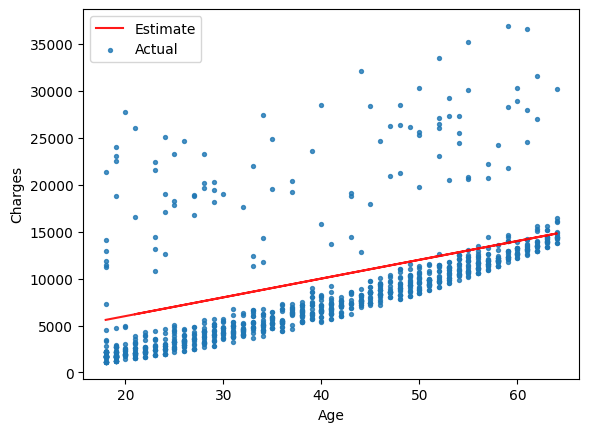

In [ ]:
try_parameters(non_smoker_df, w=200, b=2000)

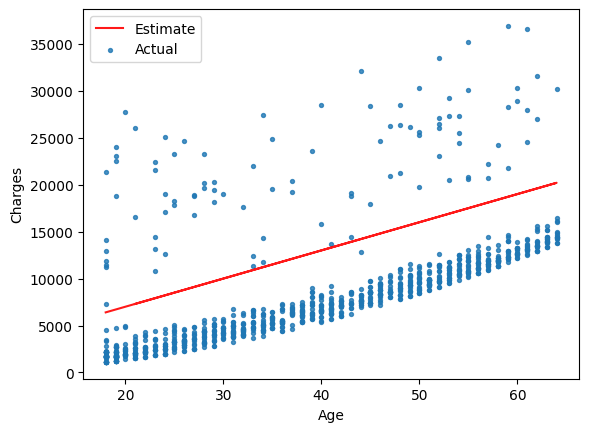

In [ ]:
try_parameters(non_smoker_df, w=300, b=1000)

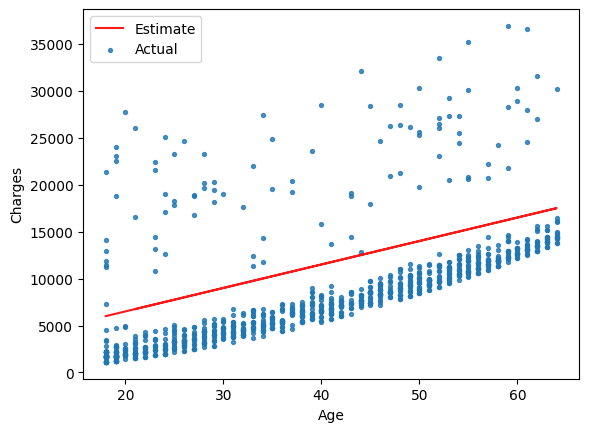

In [ ]:
try_parameters(non_smoker_df, w=250, b=1500)

Моделі із більшим w краще описують старших людей, але можуть переоцінювати молодих. b зсуває пряму вгору/вниз. Візуально ніби перший ближчий до правди.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
ages = non_smoker_df.age
charges = non_smoker_df.charges

pred1 = estimate_charges(ages, 200, 2000)
print("RMSE для w=200, b=2000:", rmse(charges, pred1))

pred2 = estimate_charges(ages, 300, 1000)
print("RMSE для w=300, b=1000:", rmse(charges, pred2))

pred3 = estimate_charges(ages, 250, 1500)
print("RMSE для w=250, b=1500:", rmse(charges, pred3))

RMSE для w=200, b=2000: 4971.5967339993995
RMSE для w=300, b=1000: 6414.638689603041
RMSE для w=250, b=1500: 5502.5490877853135


Найнижчий RMSE отримано для варіанту з параметрами w=200 та b=2000, тож математично він є кращим. Оскільки ми не використовуємо складні методи машинного навчання, найпростіша стратегія пошуку кращих параметрів - методом проб та помилок. Тобто, визначаємо діапазони для w та b, проводимо повний перебір усіх комбінацій, обчислюємо предикції, розраховуємо для кожної пари значення RMSE, обираємо ті значення w та b, при яких RMSE є найменшим.